# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID<br>
Product_ID:	Product ID<br>
Gender:	Sex of User<br>
Age:	Age in bins<br>
Occupation:	Occupation(Masked)<br>
City_Category:	Category of the City (A,B,C)<br>
StayInCurrentCityYears:	Number of years stay in current city<br>
Marital_Status:	Marital Status<br>
ProductCategory:	Product Category (Masked)<br>
Purchase:	Purchase Amount<br>

### Answering questions 
Are women spending more money per transaction than men? Why or Why not? <br>
Confidence intervals and distribution of the mean of the expenses by female and male customers <br>
Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? <br>
Results when the same activity is performed for Married vs Unmarried <br>
Results when the same activity is performed for Age <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.dpi":150})
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv('data\walmart_data.txt')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
data.shape

(550068, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
data.memory_usage(deep=True).sum()*1e-6

188.140504

In [8]:
data = data.astype({ 
             'Gender':'category', 
             'Age':'category', 
             'Occupation':'category', 
             'City_Category':'category', 
             'Stay_In_Current_City_Years':'category',
             'Marital_Status':'category',
             'Product_Category':'category'
            })

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


In [10]:
data.memory_usage(deep=True).sum()*1e-6 

48.949948

In [11]:
data.nunique(dropna=False)

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

As we can see there are less unique data than overall data as one customer might have purchased more than 1 time.<br>
So it will make sense to have dataframe of unique values for individual customer.

In [12]:
columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
unique_df = data[columns].drop_duplicates()
unique_df.index = range(len(unique_df))
unique_df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0
5887,1004871,M,18-25,12,C,2,0
5888,1004113,M,36-45,17,C,3,0
5889,1005391,M,26-35,7,A,0,0


In [13]:
unique_df.describe(include='all')

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
count,5.891000e+03,5891,5891,5891.0,5891,5891,5891.0
unique,NaN,2,7,21.0,3,5,2.0
top,NaN,M,26-35,4.0,C,1,0.0
freq,NaN,4225,2053,740.0,3139,2086,3417.0
mean,1.003025e+06,NaN,NaN,NaN,NaN,NaN,NaN
std,1.743379e+03,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.001518e+06,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.003026e+06,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.004532e+06,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
product_df = data[['User_ID', 'Product_ID', 'Product_Category', 'Purchase']]
product_df

,User_ID,Product_ID,Product_Category,Purchase
0,1000001,P00069042,3,8370
1,1000001,P00248942,1,15200
2,1000001,P00087842,12,1422
3,1000001,P00085442,12,1057
4,1000002,P00285442,8,7969
...,...,...,...,...
550063,1006033,P00372445,20,368
550064,1006035,P00375436,20,371
550065,1006036,P00375436,20,137
550066,1006038,P00375436,20,365


In [15]:
for column in unique_df.columns[1:]:
    print(column+' % Proportion:')
    display(
        round((unique_df[column].value_counts() / unique_df[column].value_counts().sum()) *100, 2)
    )
    print('-'*50)
    
for column in product_df.select_dtypes('category').columns:
    print(column+' % Proportion:')
    display(
        round((product_df[column].value_counts() / product_df[column].value_counts().sum()) *100, 2)
    )
    print('-'*50)

Gender % Proportion:


M    71.72
F    28.28
Name: Gender, dtype: float64

--------------------------------------------------
Age % Proportion:


26-35    34.85
36-45    19.81
18-25    18.15
46-50     9.01
51-55     8.16
55+       6.31
0-17      3.70
Name: Age, dtype: float64

--------------------------------------------------
Occupation % Proportion:


4     12.56
0     11.68
7     11.36
1      8.78
17     8.33
12     6.38
14     4.99
20     4.63
2      4.35
16     3.99
6      3.87
10     3.26
3      2.89
13     2.38
15     2.38
11     2.17
5      1.88
9      1.49
19     1.21
18     1.14
8      0.29
Name: Occupation, dtype: float64

--------------------------------------------------
City_Category % Proportion:


C    53.28
B    28.98
A    17.74
Name: City_Category, dtype: float64

--------------------------------------------------
Stay_In_Current_City_Years % Proportion:


1     35.41
2     19.44
3     16.62
4+    15.43
0     13.10
Name: Stay_In_Current_City_Years, dtype: float64

--------------------------------------------------
Marital_Status % Proportion:


0    58.0
1    42.0
Name: Marital_Status, dtype: float64

--------------------------------------------------
Product_Category % Proportion:


5     27.44
1     25.52
8     20.71
11     4.42
2      4.34
6      3.72
3      3.67
4      2.14
16     1.79
15     1.14
13     1.01
10     0.93
12     0.72
7      0.68
18     0.57
20     0.46
19     0.29
14     0.28
17     0.11
9      0.07
Name: Product_Category, dtype: float64

--------------------------------------------------


In [16]:
pd.crosstab(index=data.Product_Category, columns=data.City_Category, margins=True).style.background_gradient(cmap='YlGnBu')

City_Category,A,B,C,All
Product_Category,,,,
1,35081,58253,47044,140378
2,6141,10444,7279,23864
3,4943,8587,6683,20213
4,3050,5226,3477,11753
5,42211,64138,44584,150933
6,5507,8526,6433,20466
7,1226,1599,896,3721
8,32179,47553,34193,113925
9,110,174,126,410


In [17]:
pd.cut(x=data.Purchase, bins=range(0,27500,2500)).value_counts()

(5000, 7500]      133795
(7500, 10000]     131900
(15000, 17500]     66463
(10000, 12500]     59974
(2500, 5000]       58079
(0, 2500]          36844
(17500, 20000]     31369
(12500, 15000]     18953
(20000, 22500]     10341
(22500, 25000]      2350
Name: Purchase, dtype: int64

Observations
1. Around 72% customers are male. Very less female customers in data.
2. Most customers have Age range 26-35.
3. 35% customers have occupation 4, 0 or 7.
4. Around 42% sales are from City_Category B.
5. More than 50% customers staying in current city for 1 or 2 years.
6. Number of customers having Marital Status 0 is more.
7. Most selling product categories are 5, 1 and 8. They have combined sales of more than 70%.
8. In each city category there are common most selling product category that is 5, 1 and 8.
9. Most purchase amounts are in range 5000-10000.

## 3. Univariate Analysis

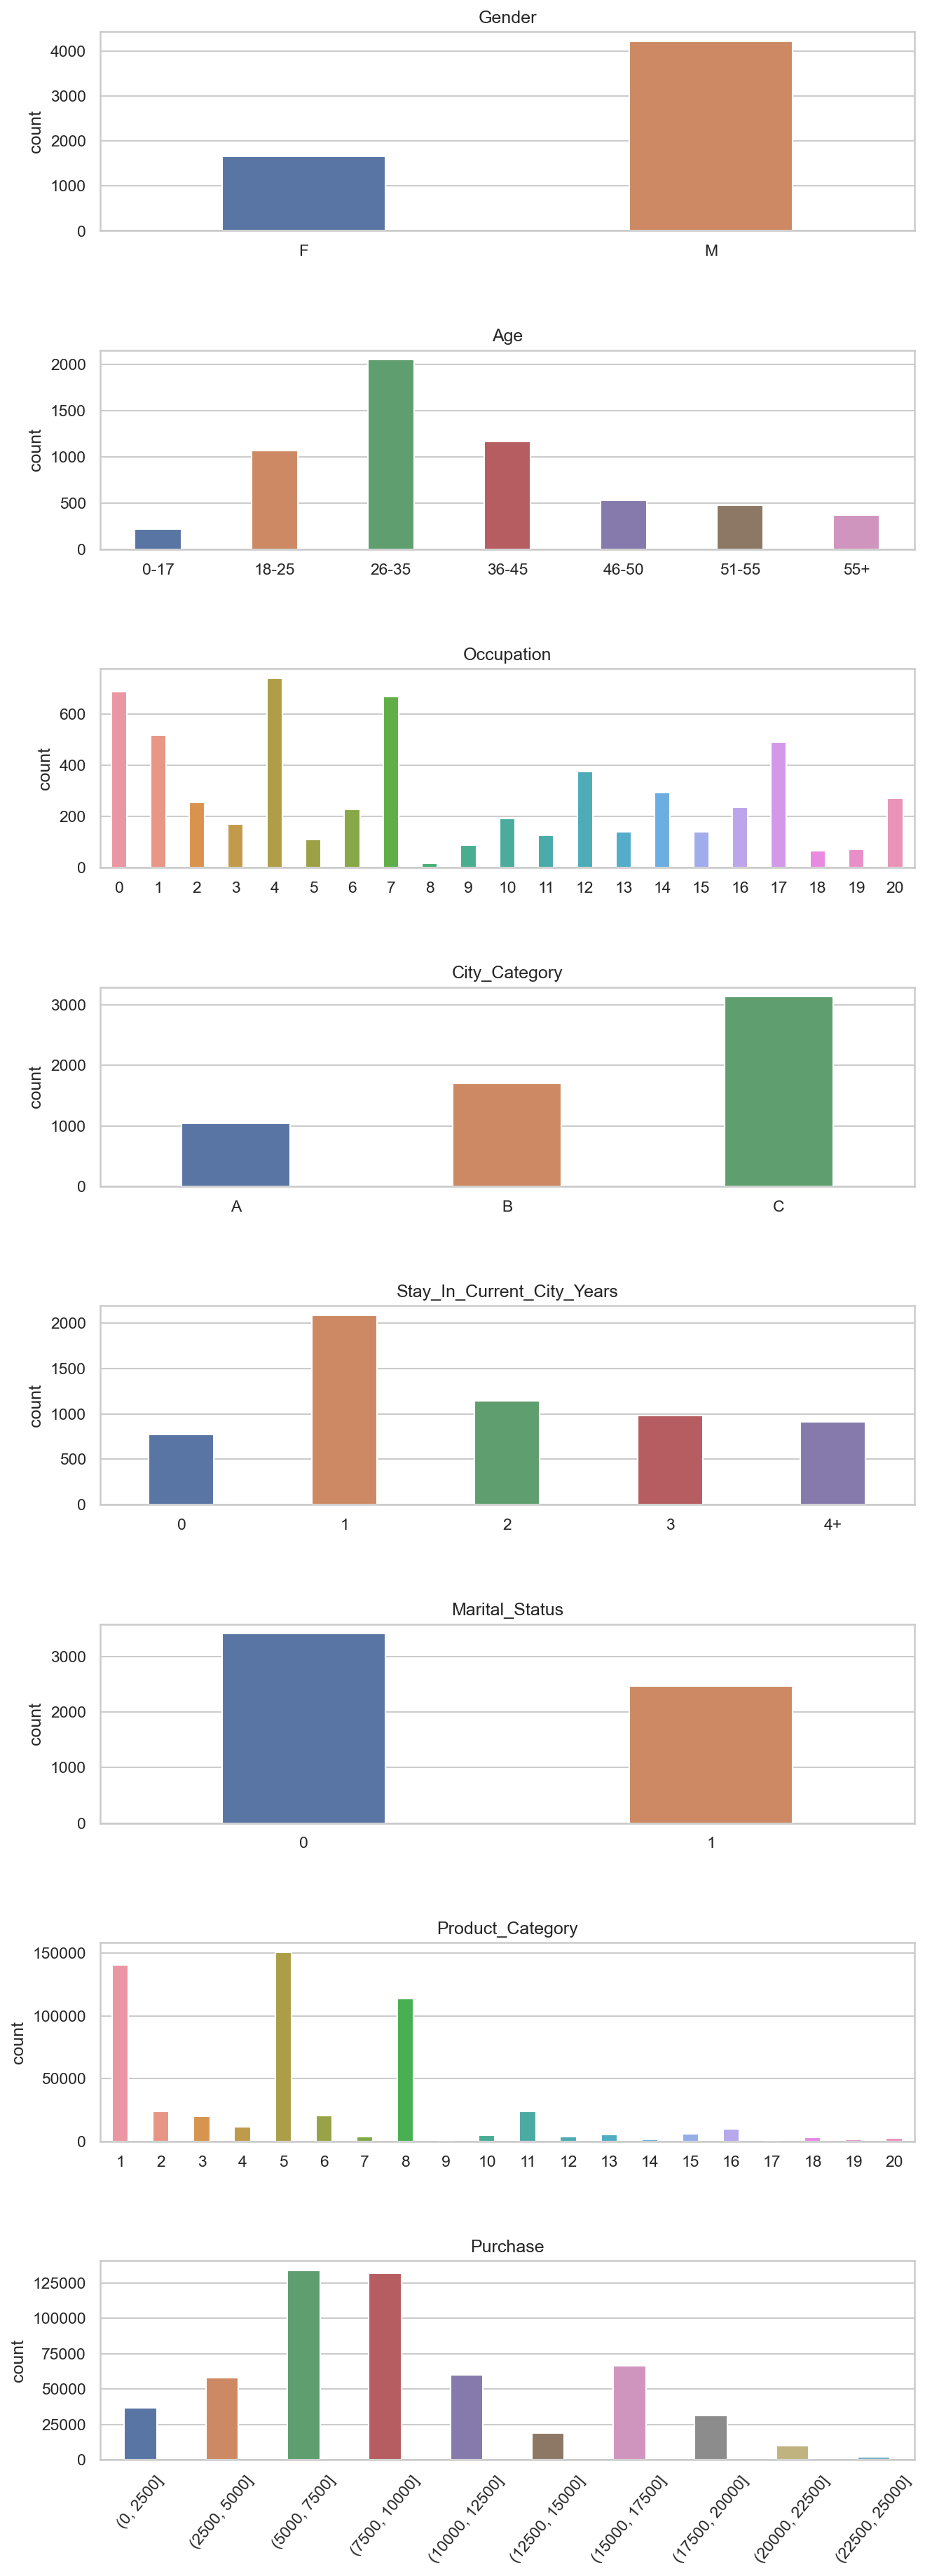

In [18]:
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(10,30))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(unique_df.columns[1:], axs.ravel()[:-2]):
    sns.countplot(x=unique_df[column],width=0.4, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

for column, ax in zip(product_df.columns[2:], axs.ravel()[-2:-1]):
    sns.countplot(x=product_df[column],width=0.4, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    
ax = axs.ravel()[-1]
sns.countplot(x=pd.cut(data['Purchase'], bins=range(0,27500,2500)),width=0.4, ax=ax)
ax.set_title('Purchase')
ax.set_xlabel('')
plt.xticks(rotation=50)
plt.show()

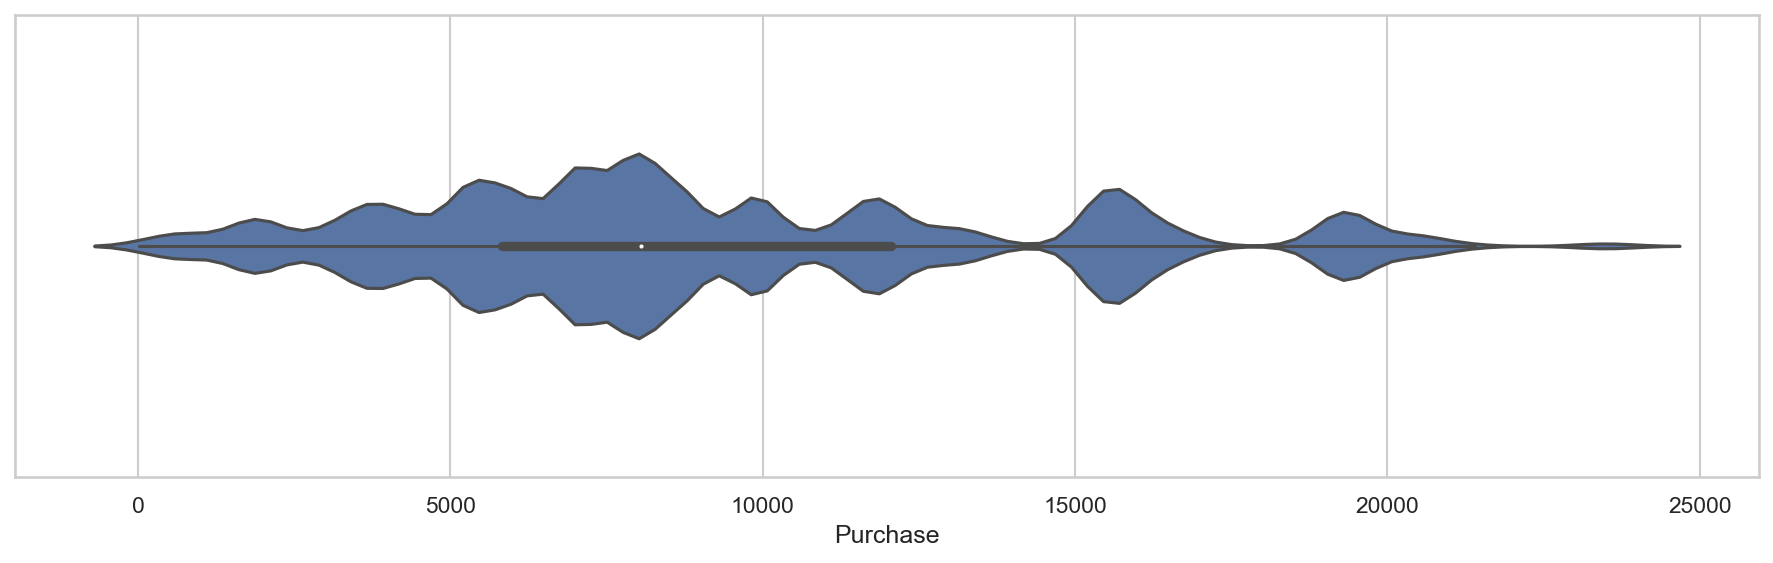

In [19]:
f, ax = plt.subplots(figsize=(15, 4))

ax = sns.violinplot(x = data.Purchase, width=.4)
# sns.stripplot(data=data.Purchase,
#               size=1, linewidth=0, alpha=0.2)# ax.set_ylim([-5, 30000])

In [20]:
lower_range, upper_range = np.percentile(data.Purchase, [.5, 99.5])

values_outside_range = data.query('Purchase<@lower_range or Purchase>@upper_range')
values_outside_range.index = range(len(values_outside_range))
values_outside_range[['City_Category', 'Gender']].value_counts().unstack()

# y = (0,0)
# sns.lineplot(x=(lower_range, upper_range),y=y)


Gender,F,M
City_Category,,
A,287,910
B,466,1424
C,617,1783


In [21]:
# checking outlier values in Purchase column

# Q3 = np.quantile(data.Purchase, 0.75)
# Q1 = data.Purchase.quantile(.25)

# IQR = Q3 - Q1
# lower_range = Q1 - 1.5 * IQR
# upper_range = Q3 + 1.5 * IQR
# outlier_free_list = [x for x in data['Purchase'] if (
#         (x > lower_range) & (x < upper_range))]
# number_of_outliers_in_purchase = len(data) - len(outlier_free_list)
# print('Number of outliers in column Purchase '+str(number_of_outliers_in_purchase)+ ' that is '\
#       +str(round((number_of_outliers_in_purchase/len(data)),6)) +'%.')
# filtered_data = data.loc[data['Purchase'].isin(outlier_free_list)]

Outliers present in Purchase are 2677 only. As per the total count of data, not much outliers present in Purchase.

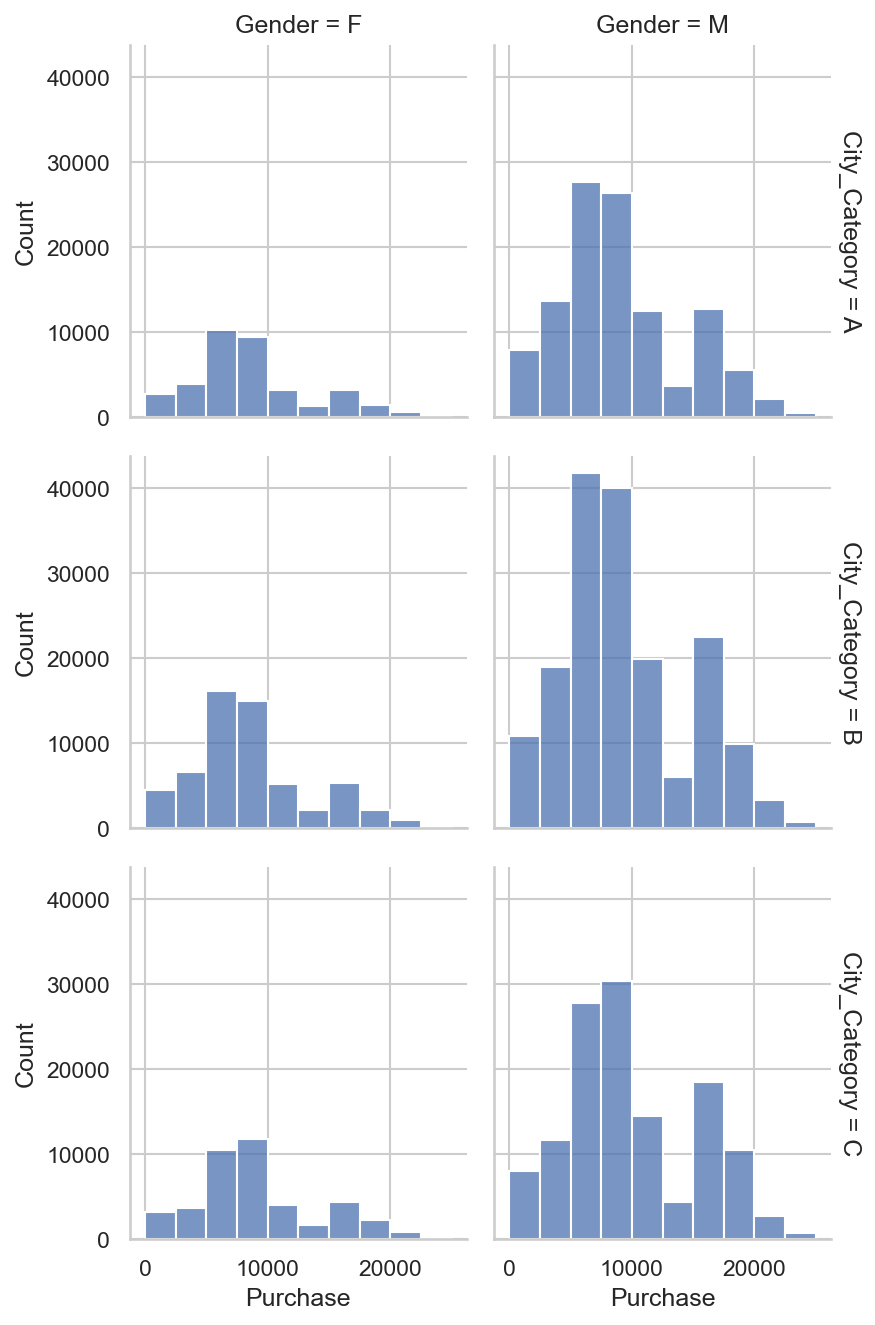

In [22]:
sns.displot(
    data, x="Purchase", col="Gender", row="City_Category",
    binwidth=2500, height=3, facet_kws=dict(margin_titles=True),
)

Purchasing power of city category B is more for both male and female than other city categories or it might coming high because city category B has most sales.


In [23]:
# lets check Purchase mean for City categories by Gender
(
    pd.crosstab(index=data.City_Category, 
        columns=[ data.Gender], values=data.Purchase, aggfunc=np.mean)
)

Gender,F,M
City_Category,,
A,8579.708576,9017.834470
B,8540.677694,9354.854433
C,9130.107518,9913.567248


City_Category C has mean Purchase more than other city categories.

In [24]:
data.groupby('City_Category')[[ 'Gender']].value_counts().unstack()

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


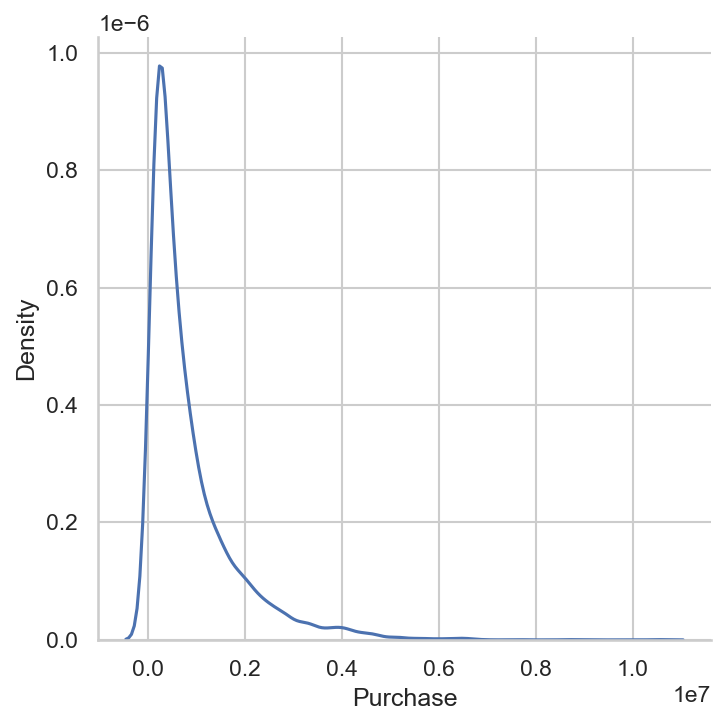

In [25]:
df = (
    data
    .groupby(['User_ID'])[['Purchase']]
    .sum()
    .dropna() 
    .reset_index()
)
sns.displot(data=df, x="Purchase", kind="kde")
# print(df)

<div>
    <br>
    <hr>
    <br>
    </div>
    

## 3. Bivariate Analysis

In [26]:
df = (
    data
    .groupby(['Gender', 'City_Category'])[['Purchase']]
    .mean()
    .dropna() 
    # .reset_index()
)

df.unstack()

Purchase                          
City_Category            A            B            C
Gender                                              
F              8579.708576  8540.677694  9130.107518
M              9017.834470  9354.854433  9913.567248

In [27]:
data.groupby(['Gender'])['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

<Figure size 3000x750 with 0 Axes>

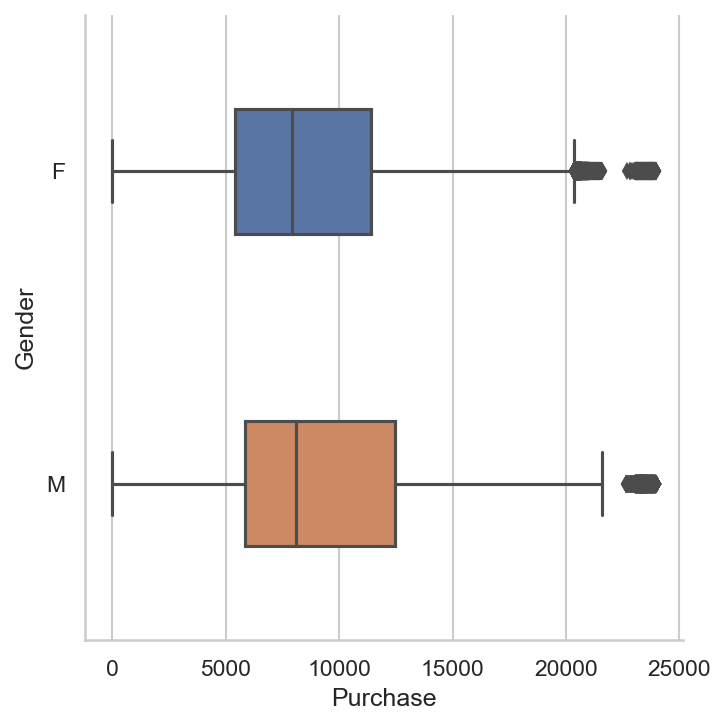

In [28]:
plt.figure(figsize=(20,5))
sns.catplot(data=data,  x = 'Purchase', y='Gender', kind='box', width=0.4)
plt.show()

In [29]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

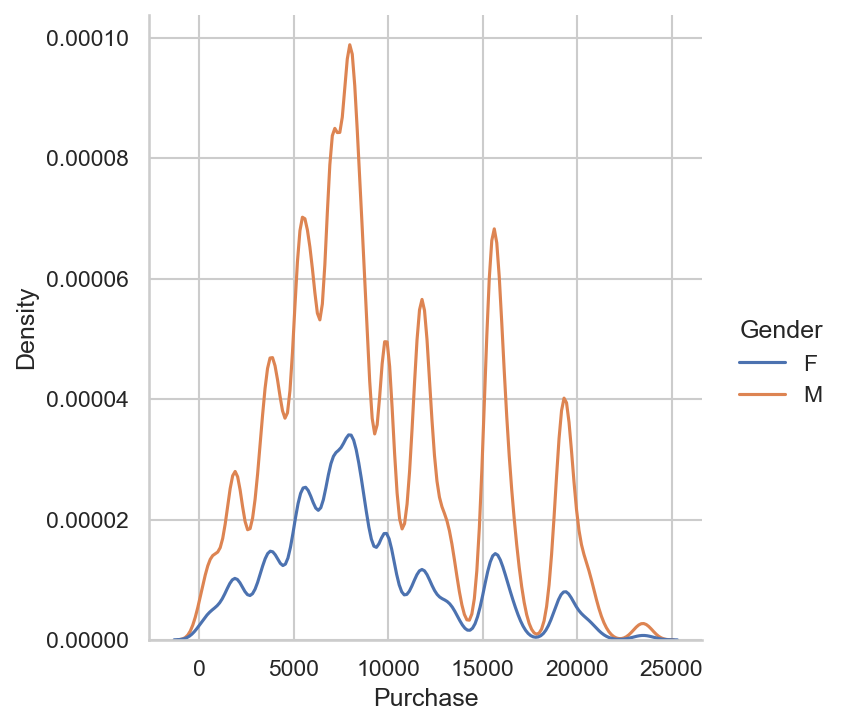

In [30]:
sns.displot(data=data, x="Purchase", hue="Gender", kind="kde")

In [31]:
df = data.drop(['Product_ID', 'Purchase', 'Product_Category'], axis=1).drop_duplicates()

In [32]:
df['Purchase_Count'] = data['User_ID'].value_counts().sort_index().values

In [33]:
df['Total_Purchase'] = data.groupby('User_ID')['Purchase'].sum().values

In [34]:
# df['Product_Category_Purchase'] = 
data.groupby(['User_ID', 'Product_Category'])['Purchase'].sum().unstack()

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
User_ID,,,,,,,,,,,,,,,,,,,,
1000001,61604,12842,119859,5612,15749,16622,0,69542,0,0,0,4194,0,11011,0,16446,0,0,0,612
1000002,413669,15870,0,0,80490,89995,0,210329,0,0,0,0,0,0,0,0,0,0,0,119
1000003,228578,29054,10906,0,63426,0,0,5817,0,0,0,0,0,0,0,0,0,3854,0,0
1000004,205987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,481
1000005,194401,26132,10851,7746,116424,65740,74954,260551,0,0,10548,0,0,11085,17374,25195,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,980016,158100,135963,35330,726646,291622,104800,1091774,0,103654,146424,2065,3035,22090,167505,140622,0,6275,0,137
1006037,188145,22931,0,3489,160607,101323,0,344410,0,52369,24196,0,3959,18372,46983,150481,0,2273,0,0
1006038,0,0,26994,0,33167,0,0,29508,0,0,0,0,0,0,0,0,0,0,0,365


In [35]:
# Are women spending more money per transaction than men? Why or Why not? (10 Points)
# Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
# Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
# Results when the same activity is performed for Married vs Unmarried (10 Points)
# Results when the same activity is performed for Age (10 Points)

In [36]:
df = (
    data
        .groupby(['User_ID', 'Gender'])['Purchase']
        .sum()
        .reset_index()
        .query('Purchase>0')
        .sort_values(by='Purchase')
)

<Axes: xlabel='Purchase', ylabel='Count'>

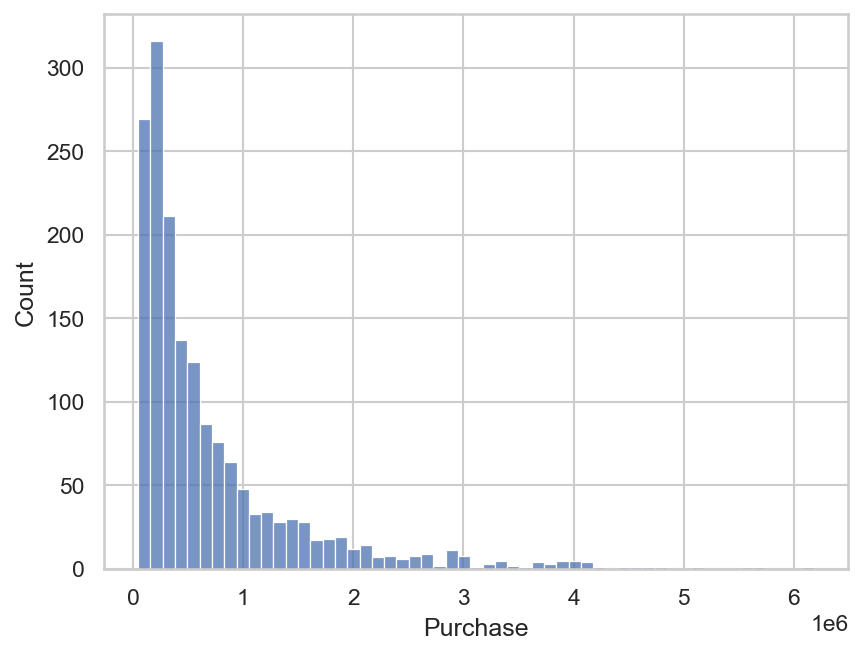

In [37]:
sns.histplot(data=df.query('Gender=="F"'), x = 'Purchase')

<Axes: xlabel='Purchase', ylabel='Count'>

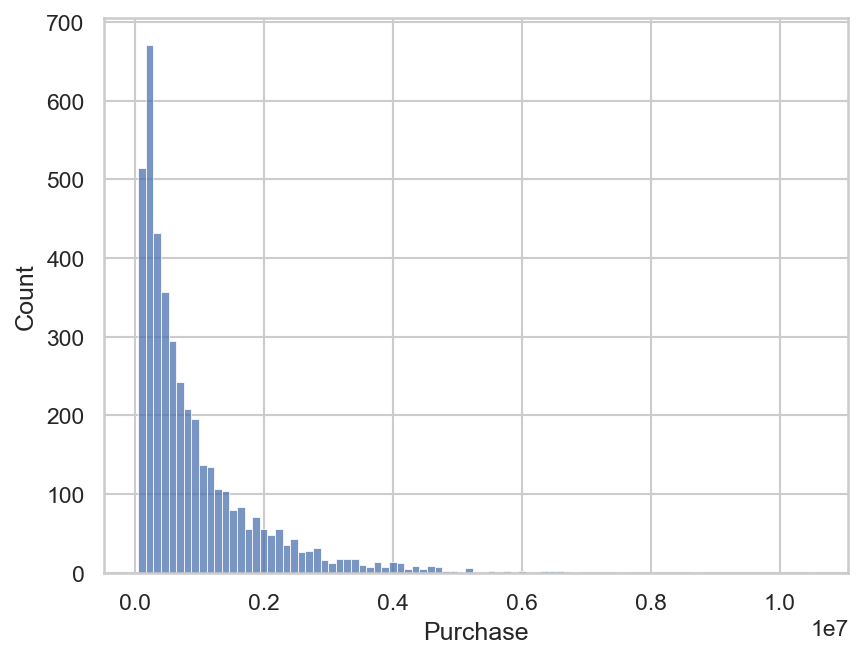

In [38]:
sns.histplot(data=df.query('Gender=="M"'), x = 'Purchase')

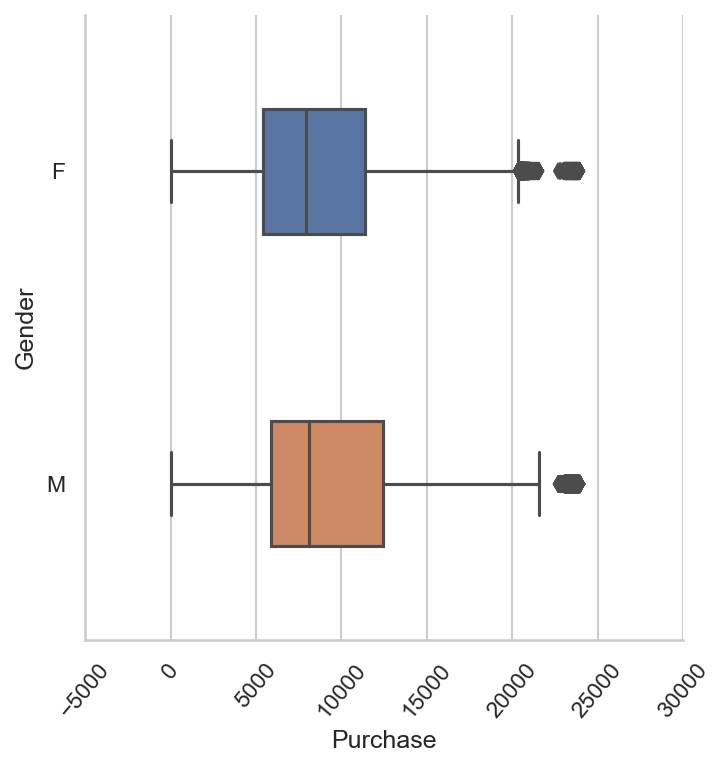

In [46]:
fig = sns.catplot(data=data,  x = 'Purchase', y='Gender', kind='box', width=0.4)
fig.set_xticklabels( rotation=50)